In [10]:
# 3.3(1đ). EDA dataset ChurnPrediction.
#1.Import data
import numpy as np
import pandas as pd

In [23]:
#2.Check header, row, column (df.head())
df = pd.read_excel("ChurnPrediction.xlsx")
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602.0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,15647311.0,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304.0,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,15701354.0,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,15737888.0,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1,0.0


In [24]:
#3.Check info (df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9997 non-null   float64
 1   credit_score      10000 non-null  float64
 2   country           9998 non-null   object 
 3   gender            10000 non-null  object 
 4   age               9998 non-null   float64
 5   tenure            10000 non-null  float64
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  float64
 8   credit_card       10000 non-null  float64
 9   active_member     10000 non-null  float64
 10  estimated_salary  10000 non-null  object 
 11  churn             10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [25]:
# Xử lý giá trị null
df.dropna(subset = ["customer_id", "age"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9995 non-null   float64
 1   credit_score      9995 non-null   float64
 2   country           9995 non-null   object 
 3   gender            9995 non-null   object 
 4   age               9995 non-null   float64
 5   tenure            9995 non-null   float64
 6   balance           9995 non-null   float64
 7   products_number   9995 non-null   float64
 8   credit_card       9995 non-null   float64
 9   active_member     9995 non-null   float64
 10  estimated_salary  9995 non-null   object 
 11  churn             9995 non-null   float64
dtypes: float64(9), object(3)
memory usage: 1015.1+ KB


In [26]:
#4.Correct data format (.astype("int/float/bool"))
df[["products_number", "age", "tenure"]] = df[["products_number","age", "tenure"]].astype("int")
df[["customer_id"]] = df[["customer_id"]].astype("object")
df[["credit_card", "active_member"]] = df[["credit_card", "active_member"]].astype("bool")
df["estimated_salary"]=pd.to_numeric(df["estimated_salary"],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9995 non-null   object 
 1   credit_score      9995 non-null   float64
 2   country           9995 non-null   object 
 3   gender            9995 non-null   object 
 4   age               9995 non-null   int64  
 5   tenure            9995 non-null   int64  
 6   balance           9995 non-null   float64
 7   products_number   9995 non-null   int64  
 8   credit_card       9995 non-null   bool   
 9   active_member     9995 non-null   bool   
 10  estimated_salary  9915 non-null   float64
 11  churn             9995 non-null   float64
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 878.5+ KB


In [27]:
#5.Deal with missing data. Drop data, Replace data
df["estimated_salary"].fillna(df['estimated_salary'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9995 non-null   object 
 1   credit_score      9995 non-null   float64
 2   country           9995 non-null   object 
 3   gender            9995 non-null   object 
 4   age               9995 non-null   int64  
 5   tenure            9995 non-null   int64  
 6   balance           9995 non-null   float64
 7   products_number   9995 non-null   int64  
 8   credit_card       9995 non-null   bool   
 9   active_member     9995 non-null   bool   
 10  estimated_salary  9995 non-null   float64
 11  churn             9995 non-null   float64
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 878.5+ KB


In [28]:
#6.Check somes statistical information (df.describe())
df.describe()

,credit_score,age,tenure,balance,products_number,estimated_salary,churn
count,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000
mean,650.583392,38.923562,5.013507,76472.896741,1.530265,100851.218229,0.203702
std,96.636508,10.488554,2.892497,62390.089771,0.581689,56893.048793,0.402770
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,52582.875000,0.000000
50%,652.000000,37.000000,5.000000,97188.620000,1.000000,100851.218229,0.000000
75%,718.000000,44.000000,7.500000,127640.395000,2.000000,149392.065000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


In [29]:
#7.Check Correlation coefficients (df.corr())
df.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.004320,0.000688,0.006254,0.012222,-0.005838,0.025507,-0.000770,-0.027226
age,-0.004320,1.000000,-0.009973,0.027972,-0.030470,-0.011866,0.085409,-0.008094,0.285144
tenure,0.000688,-0.009973,1.000000,-0.012036,0.013286,0.022598,-0.028416,0.004335,-0.013871
balance,0.006254,0.027972,-0.012036,1.000000,-0.304019,-0.014759,-0.010017,0.009085,0.118167
products_number,0.012222,-0.030470,0.013286,-0.304019,1.000000,0.003034,0.009866,0.015815,-0.047671
credit_card,-0.005838,-0.011866,0.022598,-0.014759,0.003034,1.000000,-0.011599,-0.012218,-0.007473
active_member,0.025507,0.085409,-0.028416,-0.010017,0.009866,-0.011599,1.000000,-0.012830,-0.156009
estimated_salary,-0.000770,-0.008094,0.004335,0.009085,0.015815,-0.012218,-0.012830,1.000000,0.011817
churn,-0.027226,0.285144,-0.013871,0.118167,-0.047671,-0.007473,-0.156009,0.011817,1.000000


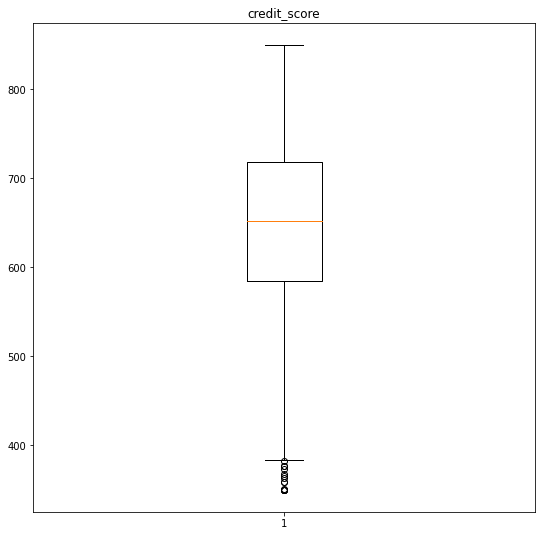

In [30]:
#8.Check outlier (boxplot)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["credit_score"])
axs.set_title("credit_score")

plt.show()

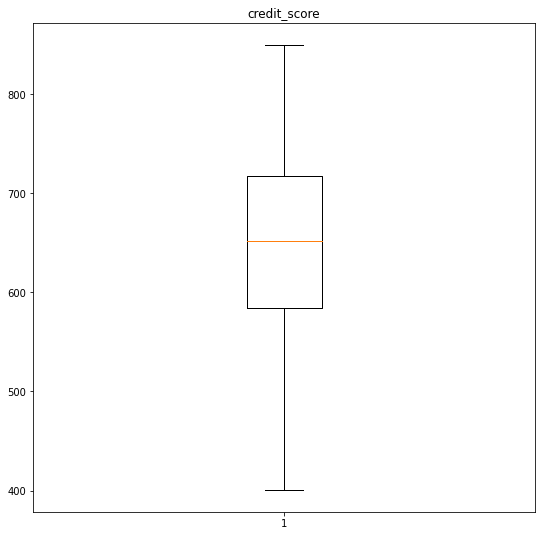

In [31]:
df = df[df["credit_score"] > 400]
fig, axs = plt.subplots(1, 1, figsize=(9, 9))

axs.boxplot(df["credit_score"])
axs.set_title("credit_score")

plt.show()

In [32]:
#9.Data Standardization.
df["Salary_USD"] = df["estimated_salary"]/23000
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Salary_USD
0,15634602.0,619.0,France,Female,42,2,0.00,1,True,True,101348.88,1.0,4.406473
1,15647311.0,608.0,Spain,Female,41,1,83807.86,1,False,True,112542.58,0.0,4.893156
2,15619304.0,502.0,France,Female,42,8,159660.80,3,True,False,113931.57,1.0,4.953547
3,15701354.0,699.0,France,Female,39,1,0.00,2,False,False,93826.63,0.0,4.079419
4,15737888.0,850.0,Spain,Female,43,2,125510.82,1,True,True,79084.10,0.0,3.438439


In [33]:
df.drop(["estimated_salary"], axis = 1, inplace = True)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,churn,Salary_USD
0,15634602.0,619.0,France,Female,42,2,0.00,1,True,True,1.0,4.406473
1,15647311.0,608.0,Spain,Female,41,1,83807.86,1,False,True,0.0,4.893156
2,15619304.0,502.0,France,Female,42,8,159660.80,3,True,False,1.0,4.953547
3,15701354.0,699.0,France,Female,39,1,0.00,2,False,False,0.0,4.079419
4,15737888.0,850.0,Spain,Female,43,2,125510.82,1,True,True,0.0,3.438439
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229.0,771.0,France,Male,39,5,0.00,2,True,False,0.0,4.185680
9996,15569892.0,516.0,France,Male,35,10,57369.61,1,True,True,0.0,4.421729
9997,15584532.0,709.0,France,Female,36,7,0.00,1,False,True,1.0,1.829808
9998,15682355.0,772.0,Germany,Male,42,3,75075.31,2,True,False,1.0,4.038631
